In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('/content/wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
## null value checking
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


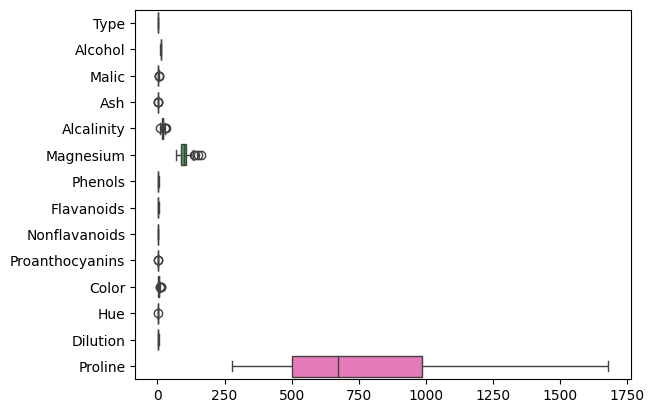

In [33]:
##visualization
sns.boxplot(df,orient='h')
plt.show()

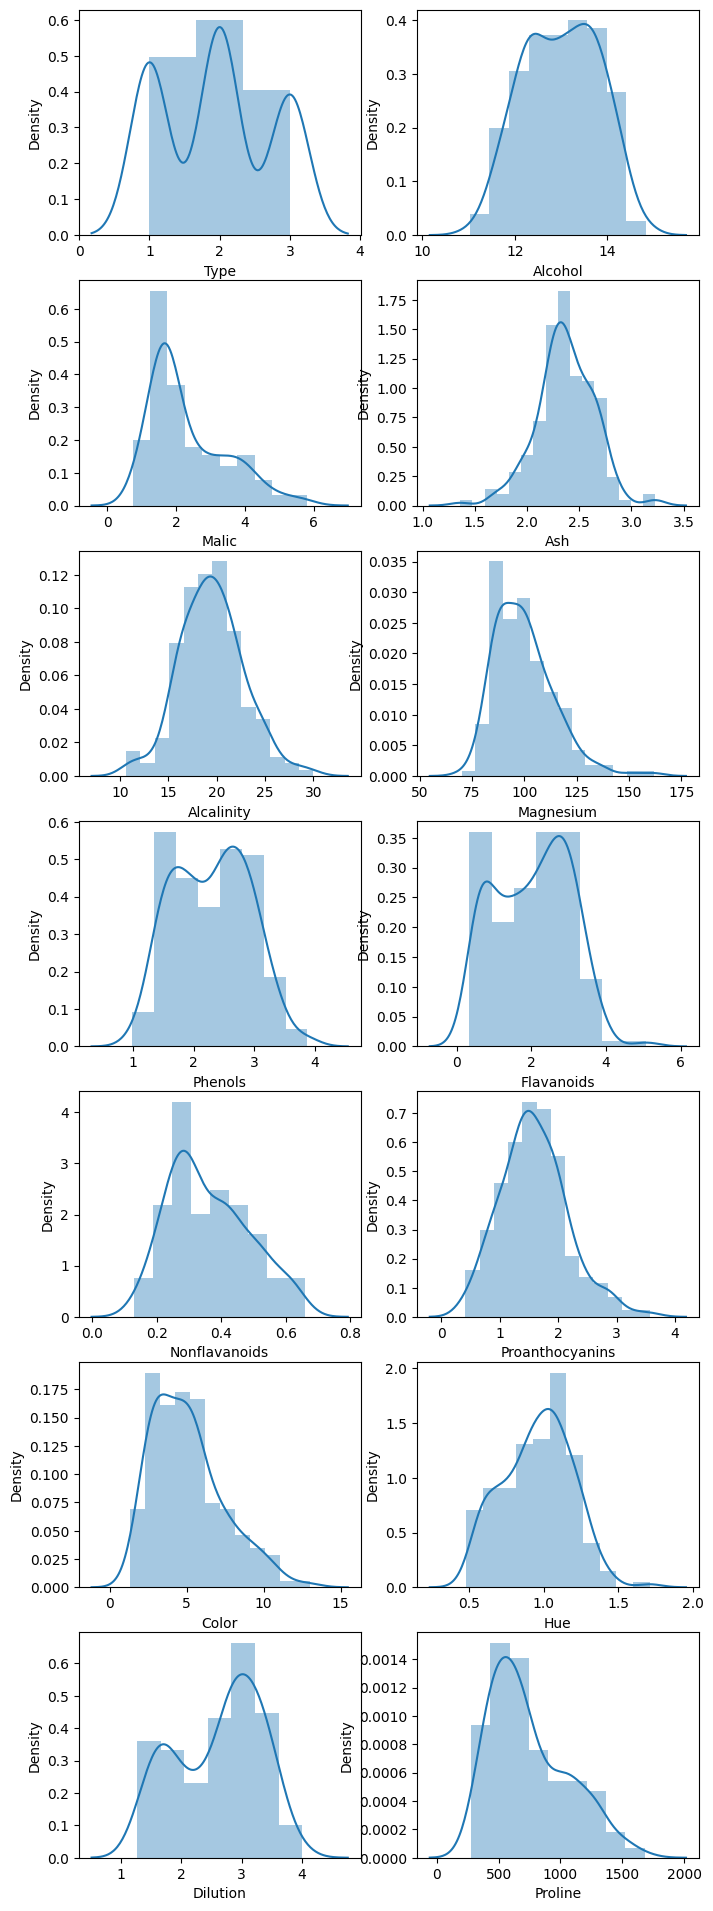

In [34]:
# Distribution plot -- histogram + densityplot(Kdeplot)
length = len(df.columns)
plt.figure(figsize=(8, 24))
for i in range(1, length+1):
  plt.subplot(int(length/2), 2, i)
  sns.distplot(df[df.columns[i-1]])
plt.show()


<Axes: >

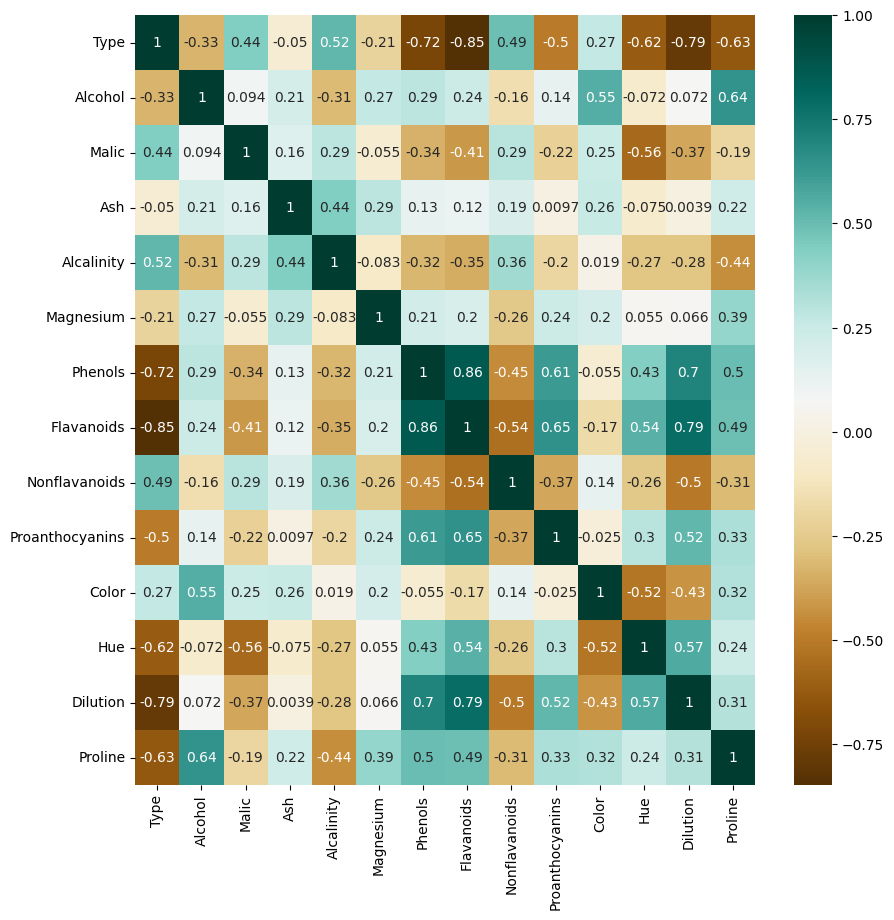

In [35]:
## corelactions:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap= plt.cm.BrBG)


In [36]:
corr=df.corr()
corr

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [37]:
## finding highest colinerity
def find_mul_corr(dataset):
    corr = dataset.corr()
    cor_column = set()
    max = 0
    for i in range(len(corr)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > max:
                max = abs(corr.iloc[i, j])
                col_name = corr.columns[i]
    cor_column.add(col_name)
    return cor_column


In [38]:
find_mul_corr(df)

{'Flavanoids'}

STANDARDISATION OF DATA:

In [39]:
st =StandardScaler()

In [40]:
arr = st.fit_transform(df)
arr

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [41]:
df = pd.DataFrame(arr, columns=df.columns)
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Clustering original data before appliying PCA:

In [44]:
k_means =KMeans(n_clusters=3)

In [45]:
labels = k_means.fit(df).labels_

In [46]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [47]:
silhouette_score(df,labels)*100

np.float64(30.648398324833455)

Visualization before applying PCA:

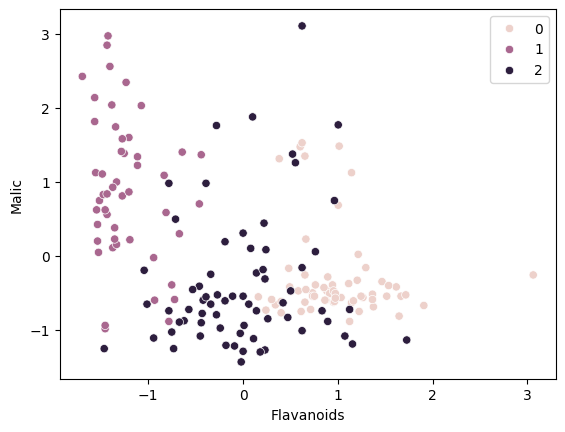

In [48]:
sns.scatterplot(data=df,x='Flavanoids',y='Malic',hue=labels)
plt.show()

Applying PCA:

In [49]:
pca =PCA()

In [50]:
pca.fit(df)

PCA()

In [51]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

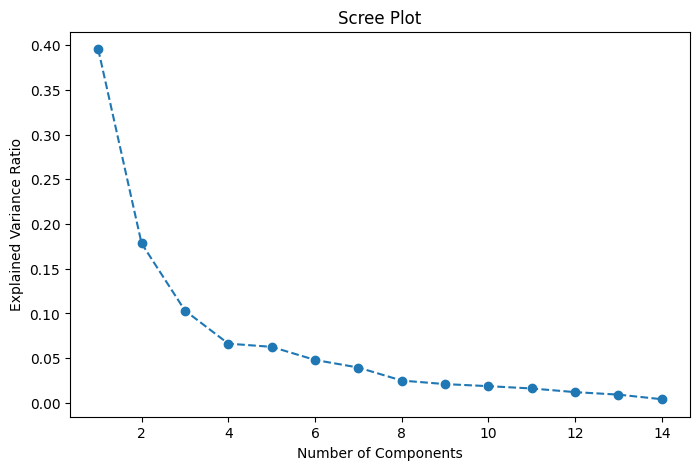

In [52]:
#finding Optimum value of n_components: using sree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(exp_var) + 1), exp_var, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [53]:
# taking 8 as the optimum no of PCA:
pca1 =PCA(n_components=8)

In [54]:
df1=pca.fit_transform(df)

In [55]:
df1.shape

(178, 14)

In [56]:
df1=pd.DataFrame(df1)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,-0.055637,-0.458765,-1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,-1.010372,0.218806,0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,0.268957,1.222769,0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,-0.618844,-0.114658,-0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,-0.434937,-0.261548,-0.112434,-0.537931,-0.226686,0.274109,-0.517498


Applying K_means after PCA:

In [57]:
k_means1=KMeans(n_clusters=3)

In [58]:
labels=k_means1.fit(df1).labels_

In [59]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [60]:
silhouette_score(df,labels)*100

np.float64(30.773604383565207)

Visualization after PCA

In [61]:
df2=pca.transform(df)

In [62]:
df2.shape

(178, 14)

In [64]:
df2 = pd.DataFrame(df2, columns=df.columns)
df2.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,-0.055637,-0.458765,-1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,-1.010372,0.218806,0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,0.268957,1.222769,0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,-0.618844,-0.114658,-0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,-0.434937,-0.261548,-0.112434,-0.537931,-0.226686,0.274109,-0.517498


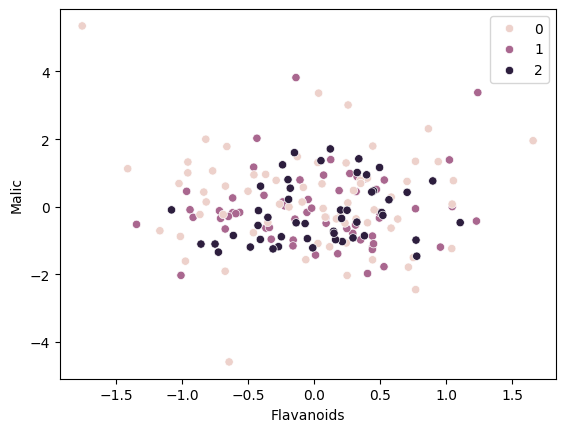

In [65]:
## After applying PCA:
sns.scatterplot(data=df2, x='Flavanoids', y='Malic', hue=labels)
plt.show()

conclusion:

PCA helps reduce the dimensionality of high-dimensional datasets, simplifying the data structure without losing much information. This process can improve computational efficiency and visualization, particularly in cases with many features.

In fraud detection, for example, PCA can distill transaction features into principal components, and clustering can then separate normal from suspicious transactions based on behavior patterns.

PCA can reduce dimensionality in customer purchase history, and clustering can group customers with similar purchasing patterns, supporting personalized marketing strategies.

1. When to Use PCA:
High-Dimensional Data: Use PCA when working with datasets that have many features, especially if there is suspected redundancy or multicollinearity among features. PCA reduces dimensionality, making the data easier to work with and visualize.
Noise Reduction: If the data is noisy or contains irrelevant features, PCA can help retain only the components with meaningful variance, improving subsequent analyses or machine learning models.

2. When to Use Clustering:
Unsupervised Data Exploration: When you need to explore the data without labeled categories, clustering can help discover natural groupings or hidden structures based on feature similarity.
Segmentation Tasks: Clustering is ideal for tasks like customer segmentation, grouping similar users or products based on shared characteristics, which can guide targeted strategies in marketing, product design, or user experience.
Pattern Recognition: Use clustering to detect patterns, trends, or behaviors in data, which is especially useful in fields like biology, sociology, or finance where groups of similar entities may reveal insights.